<font size="10">
    <b>
        Visualization and Analyzation 
        <b></font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

<font size="6">
    <b>
        Importing our species data frame
        <b></font>

In [2]:
file_param = "./Data/"
clean_n_full_df_csv = "df_numeric.csv"

df = pd.read_csv(file_param + clean_n_full_df_csv, header=0, sep=',')
df.drop("Unnamed: 0",inplace = True, axis=1) 

In [3]:
df

,Conservation Status,Phylum,Class,Order,Family,Scientific Name,Diet,Common Name,Color,Skin Type,...,Number Of Threats,Africa,America,Asia,Europe,Oceania,Ocean,Antarctica,Number Of Locations,IsExtinct
0,Least Concern,0,0,0,0,Orycteropus afer,0,Aardvark,0,0,...,2,1,0,0,0,0,0,0,1,0
1,Not Listed,0,0,1,1,Felis catus,0,Abyssinian cat,1,0,...,0,1,0,0,0,0,0,0,1,0
2,Not Listed,0,0,1,2,Canis Lupus,0,Affenpinscher,2,0,...,0,0,0,0,1,0,0,0,1,0
3,Not Listed,0,0,1,2,Canis Lupus,0,Afghan Hound,3,0,...,0,0,0,1,0,0,0,0,1,0
4,Least Concern,0,0,1,3,Civettictis civetta,0,African Civet,4,1,...,2,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,Not Evaluated,5,17,155,357,Physalia physalis,1,Man of war jellyfish,558,3,...,1,0,0,0,0,0,1,0,1,0
1734,Least Concern,5,18,156,358,Jellyfish,1,Jellyfish,559,3,...,0,0,0,0,0,0,1,0,1,0
1735,Not Evaluated,5,18,156,358,Cyanea capillata,1,Lion’s Mane Jellyfish,560,2,...,1,0,0,0,0,0,1,0,1,0
1736,Least Concern,0,19,157,2,Vampire fish,1,Lamprey,561,3,...,0,0,0,0,0,0,1,0,1,0


<font size="6">
    <b>
        Checking for highly correlated columns
        <b></font>

In [4]:
def get_highly_correlated_cols(df):
    correlations = []
    tuple_list = []
    numrtic_cols_index_pair = []
    
    numrtic_cols = df.select_dtypes(include=np.number).columns.tolist()
    correlation_df = df.corr()
    correlation_df = correlation_df.mask(np.tril(np.ones(correlation_df.shape)).astype(bool))
    corr_pairs_Series = correlation_df.unstack()
    strong_pairs_Series = corr_pairs_Series[(abs(corr_pairs_Series) >= 0.38) & (abs(corr_pairs_Series) != 1)]
    pair_keys = strong_pairs_Series.keys()
    for i in range(len(strong_pairs_Series)):
        if pair_keys[i][0] == "IsExtinct" or pair_keys[i][1] == "IsExtinct":
            correlations.append(abs(strong_pairs_Series[i]))
            tuple_i = pair_keys[i][0], pair_keys[i][1]
            tuple_list.append(tuple_i)
            tuple_arr = tuple(tuple_list)
    return correlations, tuple_arr

In [5]:
correlations, tuple_arr = get_highly_correlated_cols(df)

In [6]:
tuple_arr

(('IsExtinct', 'Habitat Loss'),
 ('IsExtinct', 'Invasive Species'),
 ('IsExtinct', 'Number Of Threats'),
 ('IsExtinct', 'America'))

In [7]:
correlations

[0.6927279761652598,
 0.44718017539027155,
 0.3887163493669915,
 0.40886350639916624]

<font size="3">
    <b>
        Now we know the properties that influance Extinction the most 
        <b></font>

<font size="8">
    <b>
        Visualizations
        <b></font>

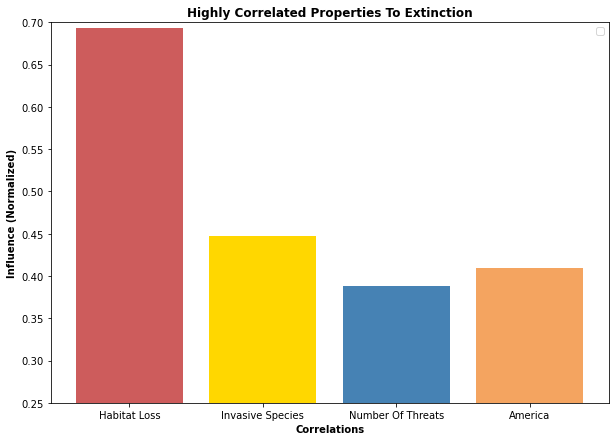

In [8]:
plt.rcParams["figure.figsize"]=[10,7]
colors = ("darkgray", "steelblue", "indianred", "sandybrown", "seagreen", )
factors_names = ['Habitat Loss','Invasive Species','Number Of Threats','America']
xpos = np.arange(len(correlations))

plt.title("Highly Correlated Properties To Extinction",fontweight='bold')
plt.xlabel("Correlations",fontweight='bold')
plt.ylabel("Influence (Normalized)",fontweight='bold')
plt.ylim([0.25, 0.7])
plt.figsize=(5,5)
plt.bar(xpos,correlations, color=("indianred", "gold", "steelblue",  "sandybrown"))
plt.xticks(xpos, factors_names)
plt.legend("")

<font size="3">
    <b>
        Splitting the DF by extinction status for better data handling
        <b></font>

In [9]:
ex_df = df[df["IsExtinct"] == 1]
alive_df = df[df["IsExtinct"] == 0]

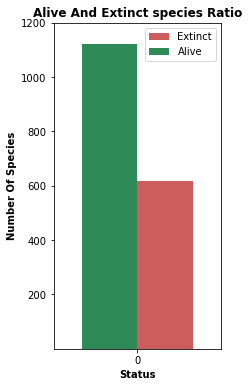

In [10]:
    extinct_and_alive_sum = [ex_df["IsExtinct"].sum(), alive_df.shape[0]]
    xpos = np.arange(1)

    plt.title("Alive And Extinct species Ratio",fontweight='bold')
    plt.xlabel("Status",fontweight='bold')
    plt.ylabel("Number Of Species",fontweight='bold')
    plt.xlim([-0.6, 0.6])
    plt.ylim([0.1, 1200])
    plt.bar(xpos+0.2,extinct_and_alive_sum[0],width=0.4, color="indianred")
    plt.bar(xpos-0.2,extinct_and_alive_sum[1],width=0.4, color="seagreen")
    plt.xticks(xpos)
    plt.legend(["Extinct", "Alive"])
    plt.gcf().set_size_inches(3, 6)
    plt.show()

<font size="6">
    <b>
        Diet property
        <b></font>

<font size="3">
    <b>
        Initializng data for Visualization
        <b></font>

In [11]:
count_ex_unique_Diet = ex_df['Diet'].value_counts()
count_alive_unique_Diet = alive_df['Diet'].value_counts()

count_ex_Omni = count_ex_unique_Diet[0]
count_ex_Carni = count_ex_unique_Diet[1]
count_ex_Herbi = count_ex_unique_Diet[2]
count_alive_Omni = count_alive_unique_Diet[0]
count_alive_Carni = count_alive_unique_Diet[1]
count_alive_Herbi = count_alive_unique_Diet[2]

omni_list = [count_alive_Omni,count_ex_Omni]
carni_list =[count_alive_Carni,count_ex_Carni]
herbi_list = [count_alive_Herbi,count_ex_Herbi]

<font size="3">
    <b>
        Extinct species by thier Diet
        <b></font>

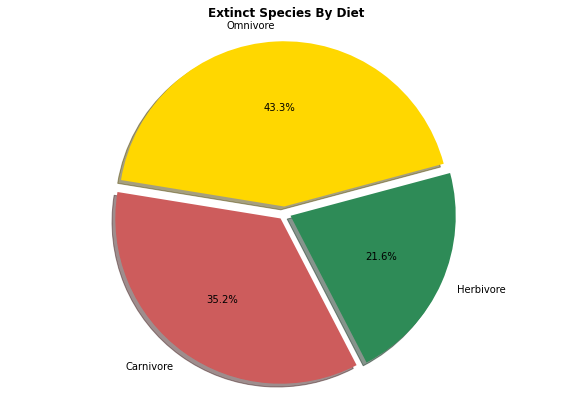

In [12]:
mycolors = ("gold","indianred", "seagreen")
myexplode = [0.04, 0.04, 0.04]
factors_names = 'Omnivore','Carnivore' ,'Herbivore'

plt.pie(count_ex_unique_Diet, labels=factors_names, autopct='%1.1f%%', startangle=15, shadow = True, colors = mycolors, explode = myexplode)
plt.title('Extinct Species By Diet',fontweight='bold')
plt.axis('equal')
plt.show()

<font size="3">
    <b>
        Extinct and living species by thier Diet
        <b></font>

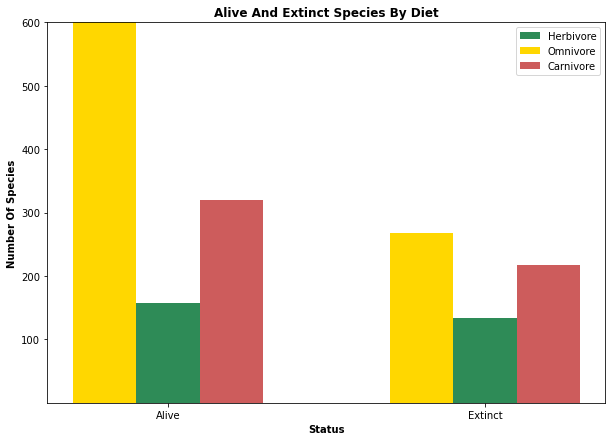

In [13]:
status_names = ['Alive','Extinct']
xpos = np.arange(len(status_names))

plt.title("Alive And Extinct Species By Diet",fontweight='bold')
plt.xlabel("Status",fontweight='bold')
plt.ylabel("Number Of Species",fontweight='bold')
plt.ylim([0.01, 600])
plt.bar(xpos,herbi_list,width=0.2, color="seagreen")
plt.bar(xpos-0.2,omni_list,width=0.2, color="gold")
plt.bar(xpos+0.2,carni_list,width=0.2, color="indianred")

plt.xticks(xpos, status_names)
plt.legend(["Herbivore", "Omnivore",  "Carnivore"])

<font size="6">
    <b>
        Class property
        <b></font>

<font size="3">
    <b>
        Initializng data for Visualization
        <b></font>

In [14]:
count_ex_unique_class = ex_df['Class'].value_counts()
count_alive_unique_class = alive_df['Class'].value_counts()

<font size="3">
    <b>
        Extinct species distribution by Class
        <b></font>

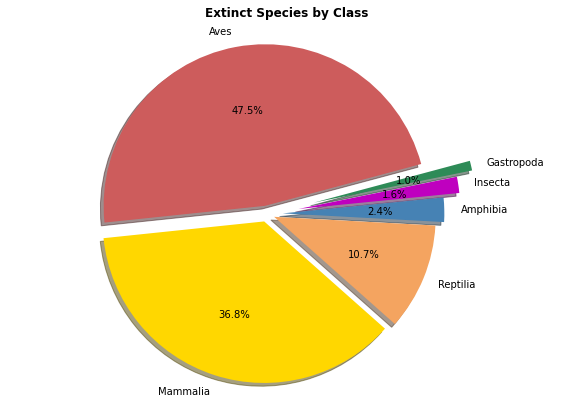

In [15]:
mycolors = "indianred","gold", "sandybrown","steelblue", "m", "seagreen"
myexplode = [0.05, 0.05,0.05 ,0.1,0.2,0.3]
factors_names = 'Aves','Mammalia','Reptilia','Amphibia','Insecta','Gastropoda'

plt.pie(count_ex_unique_class, labels=factors_names, autopct='%1.1f%%', startangle=15, shadow = True, colors = mycolors, explode = myexplode)
plt.title('Extinct Species by Class',fontweight='bold')
plt.axis('equal')
plt.show()

<font size="6">
    <b>
        Threat properties
        <b></font>

<font size="3">
    <b>
        Initializng data for Visualization
        <b></font>

In [16]:
extinct_by_threat = [ex_df["Hunting"].sum(),ex_df["Predation"].sum(),ex_df["Invasive Species"].sum(),
                     ex_df["Food Competition"].sum(),ex_df["Habitat Loss"].sum(),ex_df["Human Influance"].sum(),
                     ex_df["Pollution"].sum(),ex_df["Climate Change"].sum()]

alive_by_threat = [alive_df["Hunting"].sum(),alive_df["Predation"].sum(),alive_df["Invasive Species"].sum(),
                     alive_df["Food Competition"].sum(),alive_df["Habitat Loss"].sum(),alive_df["Human Influance"].sum(),
                     alive_df["Pollution"].sum(),alive_df["Climate Change"].sum()]

number_of_threats_uniqe_count_ex = ex_df['Number Of Threats'].value_counts()
number_of_threats_uniqe_count_alive_list =[726,163,148,77,7,0,0,0] #After finding data by alive_df['Number Of Threats'].value_counts()

<font size="3">
    <b>
        Extinct species distribution by each Threat
        <b></font>

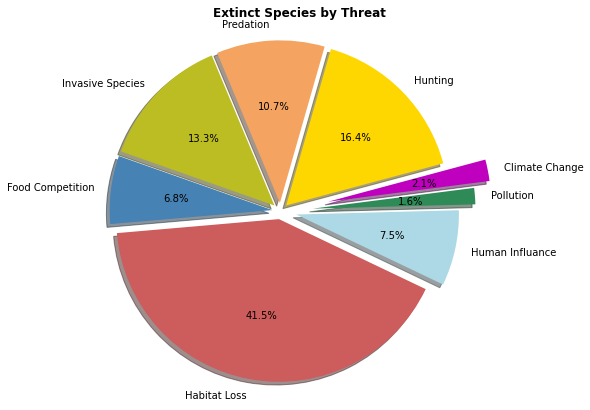

In [17]:
myexplode = [0.05, 0.05, 0.05 ,0.05 ,0.05 ,0.1,0.2,0.3]
mycolors = "gold","sandybrown", "tab:olive","steelblue","indianred", "lightblue","seagreen","m"
my_labels = "Hunting","Predation","Invasive Species","Food Competition","Habitat Loss","Human Influance","Pollution","Climate Change"

plt.pie(extinct_by_threat, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=mycolors, explode = myexplode)
plt.title('Extinct Species by Threat',fontweight='bold')
plt.axis('equal')
plt.show()

<font size="3">
    <b>
        Extinct and living species distribution by each Threat
        <b></font>

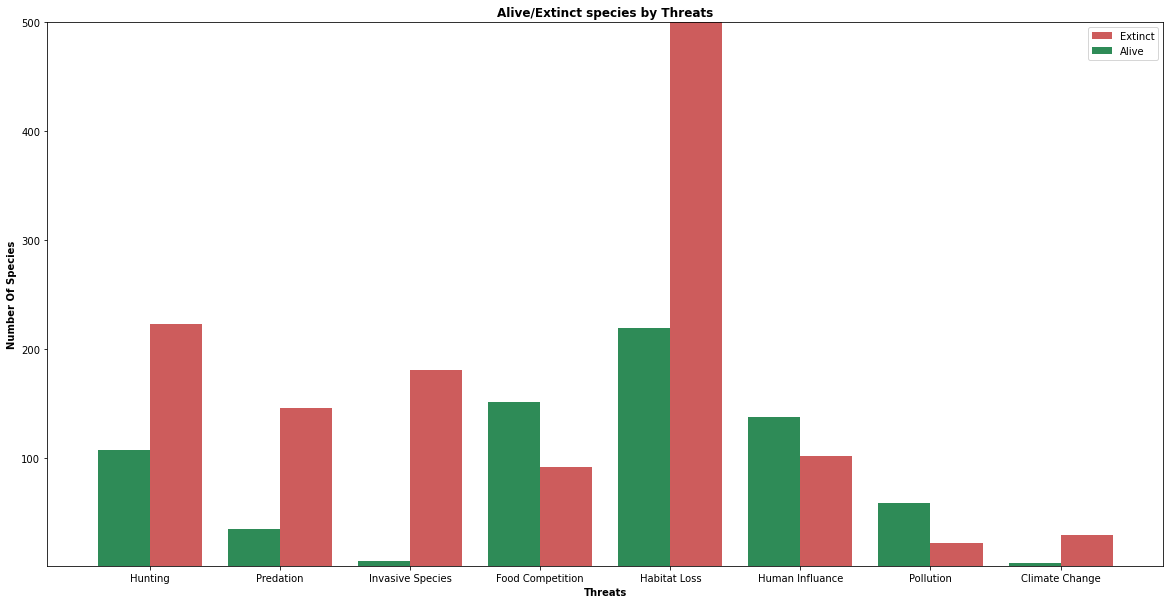

In [18]:
Threats_names = ['Hunting','Predation','Invasive Species','Food Competition','Habitat Loss','Human Influance','Pollution','Climate Change']
xpos = np.arange(len(Threats_names))

plt.title("Alive/Extinct species by Threats",fontweight='bold')
plt.xlabel("Threats",fontweight='bold')
plt.ylabel("Number Of Species",fontweight='bold')
plt.ylim([1, 500])
plt.bar(xpos+0.2,extinct_by_threat,width=0.4, color="indianred")
plt.bar(xpos-0.2,alive_by_threat,width=0.4, color="seagreen")
plt.xticks(xpos, Threats_names)
plt.gcf().set_size_inches(20, 10)
plt.legend(["Extinct", "Alive"])

<font size="3">
    <b>
        Extinct and living species by Number Of Threats
        <b></font>

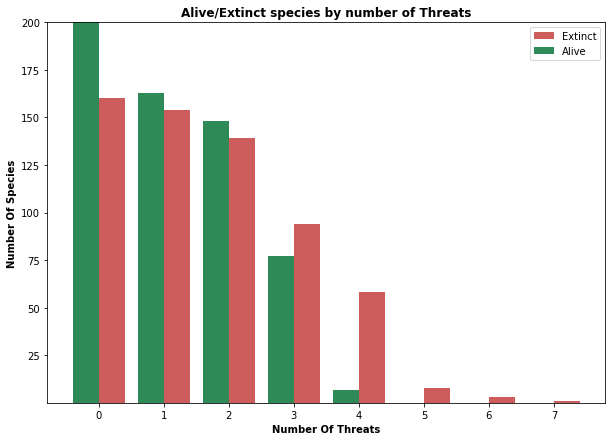

In [19]:
number_of_threats_labls = '0','1','2','3','4','5','6','7'
xpos = np.arange(len(number_of_threats_labls))

plt.title("Alive/Extinct species by number of Threats",fontweight='bold')
plt.xlabel("Number Of Threats",fontweight='bold')
plt.ylabel("Number Of Species",fontweight='bold')
plt.ylim([0.01, 200])
plt.bar(xpos+0.2,number_of_threats_uniqe_count_ex,width=0.4, color="indianred")
plt.bar(xpos-0.2,number_of_threats_uniqe_count_alive_list,width=0.4, color="seagreen")
plt.xticks(xpos, number_of_threats_labls)
plt.legend(["Extinct", "Alive"])

<font size="6">
    <b>
        Location properties
        <b></font>

<font size="3">
    <b>
        Initializng data for Visualization
        <b></font>

In [20]:
extinct_by_continent = [ex_df["Africa"].sum(),ex_df["America"].sum(),ex_df["Antarctica"].sum(),
                            ex_df["Asia"].sum(),ex_df["Europe"].sum(),ex_df["Ocean"].sum(),ex_df["Oceania"].sum()]

alive_by_continent = [alive_df["Africa"].sum(),alive_df["America"].sum(),alive_df["Antarctica"].sum(),
                            alive_df["Asia"].sum(),alive_df["Europe"].sum(),alive_df["Ocean"].sum(),alive_df["Oceania"].sum()]

<font size="3">
    <b>
        Extinct species distribution by each Location
        <b></font>

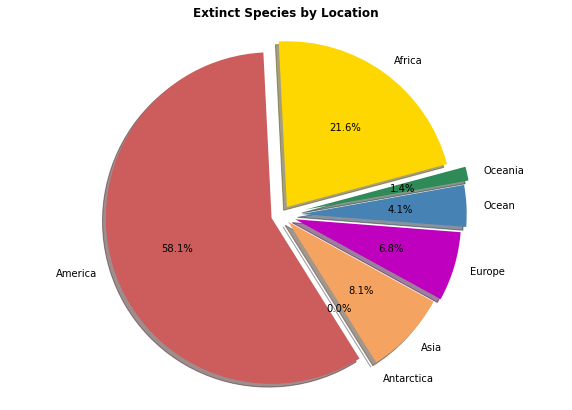

In [21]:
myexplode = [0.06,0.06,0.06,0.06,0.09,0.12,0.15]
mycolors = ("gold","indianred","darkgray", "sandybrown", "m", "steelblue",  "seagreen")
my_labels = "Africa","America","Antarctica","Asia","Europe","Ocean","Oceania"

plt.pie(extinct_by_continent, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=mycolors, explode = myexplode)
plt.title('Extinct Species by Location',fontweight='bold')
plt.axis('equal')
plt.show()

<font size="3">
    <b>
        Extinct and living species distribution by each Location
        <b></font>

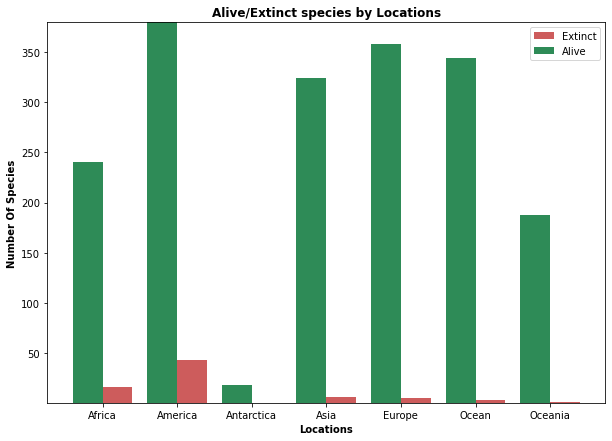

In [22]:
Locations_names = ['Africa','America','Antarctica','Asia','Europe','Ocean','Oceania']
xpos = np.arange(len(Locations_names))

plt.title("Alive/Extinct species by Locations",fontweight='bold')
plt.xlabel("Locations",fontweight='bold')
plt.ylabel("Number Of Species",fontweight='bold')
plt.ylim([0.01, 380])
plt.bar(xpos+0.2,extinct_by_continent,width=0.4, color="indianred")
plt.bar(xpos-0.2,alive_by_continent,width=0.4, color="seagreen")
plt.xticks(xpos, Locations_names)
plt.legend(["Extinct", "Alive"])

<font size="6">
    <b>
        Birth Rate Property
        <b></font>

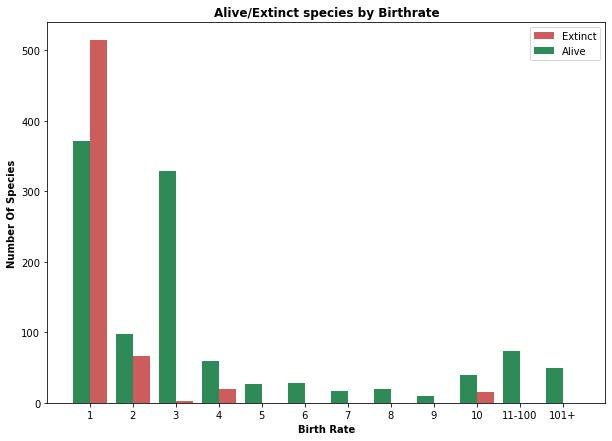

In [23]:
Birthrate_labls = '1','2','3','4','5','6','7','8','9','10','11-100','101+'
Birthrate_uniqe_count_ex = [514,67,3,19,0,0,0,0,0,15,0,0]  
Birthrate_uniqe_count_alive_list = [372,97,329,59,26,28,17,19,9,39,73,50] 
xpos = np.arange(len(Birthrate_labls))

plt.title("Alive/Extinct species by Birthrate",fontweight='bold')
plt.xlabel("Birth Rate",fontweight='bold')
plt.ylabel("Number Of Species",fontweight='bold')
plt.bar(xpos+0.2,Birthrate_uniqe_count_ex,width=0.4, color="indianred")
plt.bar(xpos-0.2,Birthrate_uniqe_count_alive_list,width=0.4, color="seagreen")
plt.xticks(xpos, Birthrate_labls)
plt.legend(["Extinct", "Alive"])